In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import matplotlib.lines as mlines




In [57]:
a = pd.read_csv(r'C:\Users\smille25\Downloads\livestocklosscomparison.csv')
a = a[['emodis','rendvi','avgloss']]
a = a.dropna()
a = a[a['avgloss']>0]
a = a[a['avgloss']<=1.0]

In [5]:
x1 = a['emodis']+10
x2 = a['rendvi']+10
y = a['avgloss']


r 0.35395553317442124


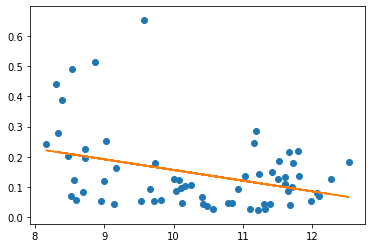

In [6]:
plt.scatter(x1 ,y)

def linear_func(x,m,b):
    return m*x+b
popt, pcov = curve_fit(linear_func, x1,y)

residuals = y- linear_func(x1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r', np.sqrt(r_squared))

plt.plot(x1, popt[0]*x1 + popt[1], color= "C1")


r 0.4462522971685749 [-1.24521193e+01  5.21898990e+10  1.04741191e-01]


C:\Users\smille25\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


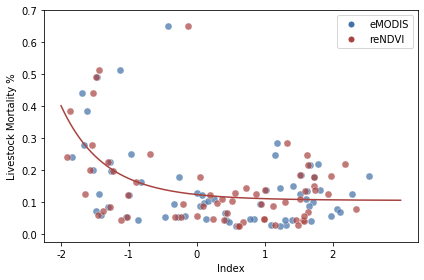

In [58]:
plt.scatter(x1 ,y, s=50, alpha=.7, linewidth=.5, edgecolor="white",color="#416fa6")
plt.scatter(x2 ,y, s=50, alpha=.7, linewidth=.5, edgecolor="white",color="#a8423f")

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

popt, pcov = curve_fit(func_powerlaw, a.emodis+10, a.avgloss, p0 = np.asarray([-1,10**5,0]))

residuals = y- func_powerlaw(x1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r', np.sqrt(r_squared), popt)

xnew = xnew = np.linspace(8, 13., 5000)

plt.plot(xnew, func_powerlaw(xnew, *popt), 'r', color="#a8423f")
blue_star = mlines.Line2D([], [], color='#416fa6', marker='o', linestyle='None',
                          markersize=5, label='eMODIS')
red_square = mlines.Line2D([], [], color='#a8423f', marker='o', linestyle='None',
                          markersize=5, label='reNDVI')


plt.legend(handles=[blue_star, red_square])
plt.xlabel('Index')
plt.xticks(np.arange(8,13), labels=np.arange(-2,3))
plt.ylabel('Livestock Mortality %')
plt.tight_layout()
plt.savefig(r'C:\Users\smille25\Downloads\rendvistuff\paperimages\FIG9_.png', format='png', dpi=300, frameon=True, bbox_inches='tight')


r 0.39139810310817624 [ 2.79878068 -0.29451228]


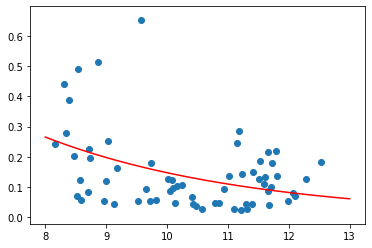

In [10]:
plt.scatter(x1 ,y)

def func_powerlaw(x, a, b):
    return a*np.exp(x*b)



popt, pcov = curve_fit(func_powerlaw, a.emodis+10, a.avgloss, p0 = np.asarray([50,-0.001]))

residuals = y- func_powerlaw(x1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r', np.sqrt(r_squared), popt)

xnew = xnew = np.linspace(8, 13., 5000)

plt.plot(xnew, func_powerlaw(xnew, *popt), 'r')

r 0.5247217591775541 [ 0.9899976  -0.00745469  0.11758812]


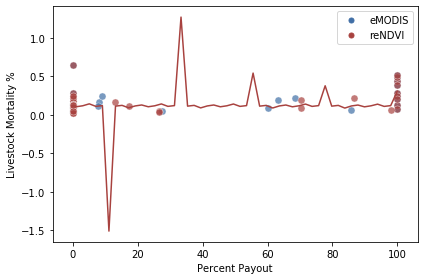

In [54]:
#payouts
plt.scatter(a.emodis ,y, s=50, alpha=.7, linewidth=.5, edgecolor="white",color="#416fa6")
plt.scatter(a.rendvi ,y, s=50, alpha=.7, linewidth=.5, edgecolor="white",color="#a8423f")

def func_powerlaw(x, m, c, c0):
    return c0 + np.tan(x*m) * c

popt, pcov = curve_fit(func_powerlaw, a.emodis, a.avgloss, p0 = np.asarray([1,1,0]))

residuals = y- func_powerlaw(a.emodis, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print('r', np.sqrt(r_squared), popt)

xnew = xnew = np.linspace(1, 100)

plt.plot(xnew, func_powerlaw(xnew, *popt), 'r', color="#a8423f")
blue_star = mlines.Line2D([], [], color='#416fa6', marker='o', linestyle='None',
                          markersize=5, label='eMODIS')
red_square = mlines.Line2D([], [], color='#a8423f', marker='o', linestyle='None',
                          markersize=5, label='reNDVI')


plt.legend(handles=[blue_star, red_square])
plt.xlabel('Percent Payout')
#plt.xticks(np.arange(8,13), labels=np.arange(-2,3))
plt.ylabel('Livestock Mortality %')
plt.tight_layout()
#plt.savefig(r'C:\Users\smille25\Downloads\rendvistuff\paperimages\FIG9_.png', format='png', dpi=300, frameon=True, bbox_inches='tight')
